In [1]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784')

In [13]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [7]:
type(mnist.data)

pandas.core.frame.DataFrame

In [10]:
mnist.data.iloc[1,:].values.reshape(28,28)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [11]:
mnist.data.iloc[1,:].min()

0.0

In [12]:
mnist.data.iloc[1,:].max()

255.0

In [15]:
type(mnist.target)

pandas.core.series.Series

In [16]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [17]:
mnist.target.values

['5', '0', '4', '1', '9', ..., '2', '3', '4', '5', '6']
Length: 70000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
mnist.target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.1, stratify = mnist.target)

In [22]:
rf_clf = RandomForestClassifier(n_estimators = 500)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

0.9688571428571429

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
n_test = len(X_test)
n_test

7000

In [25]:
random_pick = np.random.randint(0, n_test, 10)
random_pick

array([2053, 2276,  638, 6188,  721, 1760, 4784, 2586, 1936, 4296])

In [27]:
mnist.data.iloc[2053]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 2053, Length: 784, dtype: float64

In [29]:
mnist.target.iloc[2053]

'2'

['1', '3', '5', '7', '8', '8', '0', '7', '8', '9']


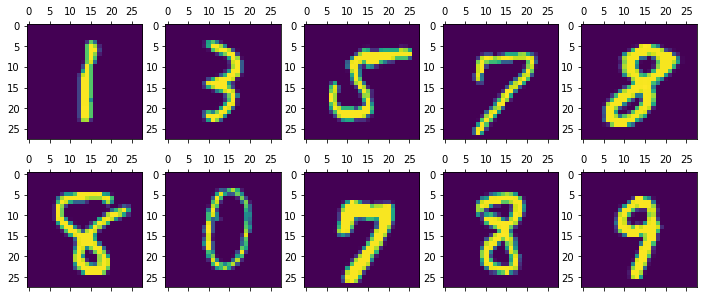

In [38]:
figure = plt.figure(figsize = (12,5))
axes = []
for i in range(1,11):
    axes.append(figure.add_subplot(2,5,i))
    
tmp_list = []
for i in range(10):
    tmp = X_test.iloc[random_pick[i]]
    tmp = np.array(tmp).reshape(28,28)  #어레이형태로 바꿔줌
    tmp_list.append(tmp)
    # print(type(tmp))    

print(y_test.iloc[random_pick].tolist())
for i in range(10):
    axes[i].matshow(tmp_list[i])

In [39]:
import glob
from PIL import Image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0  72 191  96   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 231
  255 247   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 255 255 255   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0  72 255 255 255   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 231 255 255 255   0   0   0 

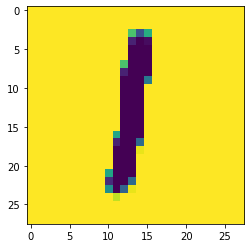

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  72 223 255 255 255 223  96   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  72 223 255 255 255 255 255
  255 247  96   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  72 239 255 255 255 255 255 255 255 255 247  96   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 231 255 255 255 255 151
    0 120 255 255 255 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  72 255 255 255 151   0   0   0   0 120 255 255 255   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0 223 255 255 255   0
    0   0   0   0   0 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 120 255 255 151   0   0   0   0   0   0 255 255 255
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 255 255 

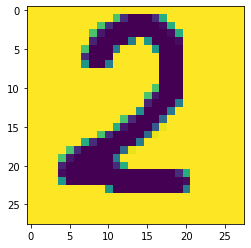

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  72 223 255 255 255 255 255 223  96   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0  72 223 255 255 255 255 255 255
  255 255 247  96   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 223 255 255 255 255 255 255 255 255 255 255 247   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0 120 255 255 255 151   0
    0   0 120 255 255 255 120   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0 143 255 255 247   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  80 255 255 255 

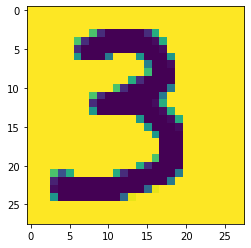

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0  72 191  96   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 231 255 247   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 104 255 255 255   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 231 255 255 167   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  72 191  96   0   0   0   0   0   0 255 255 255   8   0
    0   0   0   0   0   0   0   0   0   0   0   0   0  72 239 255 247   0
    0   0   0   0  72 255 255 255   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 231 255 255 255   0   0   0   0   0 231 255 255 255
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
  151   0   0   0   0   0 255 255 255 

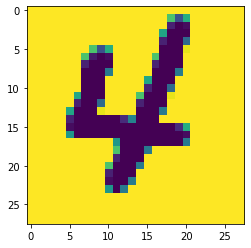

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  72 191  96   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 231 255 247
    0   0  72 223 255 223  96   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 147 255 255 255 255 255 255 255 255 255 247   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 252 255
  255 255 255 255 255 255 255 255 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 151   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104
  255 255 255   0   0   0   0   0   0 

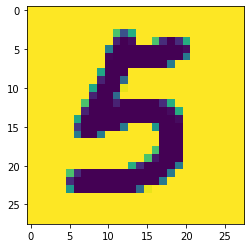

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  72 191  96   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   72 239 255 247   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  72 239 255 255 255   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   72 239 255 255 255 151   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0  72 239 255 255 255 151   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   72 239 255 255 255 151   0   0   0 

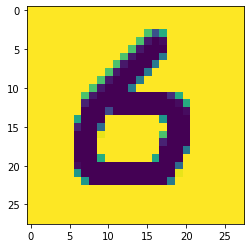

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  16 128 223 255 255 255 255 223  96   0
    0   0   0   0   0   0   0   0   0   0   0   0  72 209 235 255 255 255
  255 255 255 255 255 255 255 255 247   0   0   0   0   0   0   0   0   0
    0   0   0  72 239 255 255 255 255 255 255 255 255 255 255 255 255 255
  255   0   0   0   0   0   0   0   0   0   0   0   0 231 255 255 255 255
  255 255 255 223  96   0   0 104 255 255 255   0   0   0   0   0   0   0
    0   0   0   0   0 255 255 255 151   0   0   0   0   0   0   0   0 231
  255 255 167   0   0   0   0   0   0   0   0   0   0   0  72 255 255 255
    0   0   0   0   0   0   0   0   0 

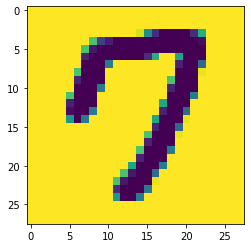

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  72 223 255 255 255 255 223  96   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  72 239 255 255 255 255 255
  255 255 255 223 104   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 231 255 255 255 255 255 255 255 255 255 255 255 120   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 151   0
    0 120 255 255 255 255 255 247   8   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 255 255 255   0   0   0   0   0   0  80 255 255 191
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255
    0   0   0   0   0  72 239 255 255 

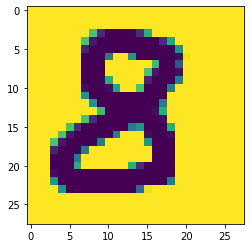

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  72 223 255 255 255 255 255 223  96   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0  72 223 255 255
  255 255 255 255 255 255 247   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 231 255 255 255 255 255 255 255 255 255 247  96
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  72 255 255
  255 255 151   0   0   0  72 239 255 

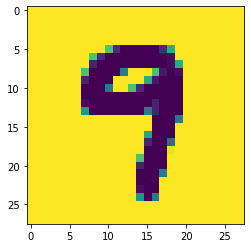

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  72 223 255 255 255 255 255
  255 255 223  96   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0  72 223 255 255 255 255 255 255 255 255 255 255 255 223  96   0   0
    0   0   0   0   0   0   0   0   0   0   0 231 255 255 255 255 255 255
  255 255 255 255 255 255 255 247  96   0   0   0   0   0   0   0   0   0
    0   0 128 255 255 255 255 151   0   0 120 255 255 255 255 255 255 255
  247  96   0   0   0   0   0   0   0   0   0 104 255 255 255 167   0   0
    0   0   0   0 120 255 151 120 255 

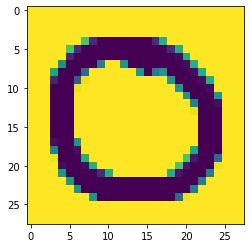

In [50]:
# *.png는 이름 관계없는 모든것 중 확장자 png인것
for image_path in glob.glob('./data/*.png'):
    #print(image_path)
    img = Image.open(image_path).convert('L') #convert L로 그레이스케일로 바꿔줄것 바꾸기전에는 RGB모드임
    plt.imshow(img)
    # print(img)
    # print(np.resize(img,(1,784)))
    img = np.resize(img,(1,784)) # 모델이 학습했던 데이터와 형태가 같은걸로 맞춰줘야 한다.
    img = 255-img #색상 반전시키기
    print(img)
    pred = rf_clf.predict(img)
    print(pred)
    plt.show()

In [51]:
import pickle

In [56]:
f = open('model.pickle','wb') # 텍스트의 형태일때는 w여도 되지만 텍스트를 제외한것은 w뒤에 b를 붙여준다

In [57]:
pickle.dump(rf_clf, f)

In [58]:
f.close()

In [59]:
f = open('model.pickle','rb')
model = pickle.load(f)
f.close()

['1']


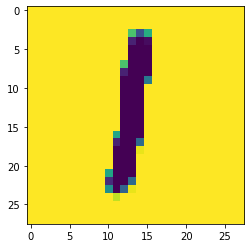

In [60]:
img = Image.open('./data/1.png').convert('L') 
plt.imshow(img)
img = np.resize(img,(1,784))
img = 255-img 
pred = model.predict(img)
print(pred)
plt.show()